# Conceptos básicos sobre Medias Móviles.

**Si no compartes el conocimiento no sirve para nada.** [Michio Kaku](https://www.youtube.com/watch?v=6rDxlolYUQw)

[How to Backtest your First Trading Strategy in Python](https://raposa.trade/blog/how-to-backtest-your-first-trading-strategy-in-python/)
[Algorithmic-Trading-with-Python](https://github.com/Nikhil-Adithyan/Algorithmic-Trading-with-Python/tree/main/Momentum)

SMA Trading Startegies

[Generating Buy and Sell Signals for SMA, MACD, and Bollinger-Bands with Python](https://tradewithpython.com/generating-buy-sell-signals-using-python)

https://medium.datadriveninvestor.com/unleashing-the-power-of-momentum-trading-with-python-b878b7b5f805

[stackoverflow](https://es.stackoverflow.com/questions/548054/identificar-los-puntos-en-los-que-cambia-el-valor-de-una-columna-en-un-dataframe)
data.Position.diff().replace({-1.0: "Buy", 1.0: "Sell", 0.0: "Hold"})

## Importación de módulos

In [28]:
import math
from math import floor
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
from datetime import datetime 
import matplotlib.pyplot as plt
#from termcolor import colored as cl
import plotly.express as px
from plotly.offline import iplot
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('fivethirtyeight')


## Importación de cotizaciones

Importamos cotizaciones, utilizaremos la función `get_quotes()`, para lo que tendremos que definir previamente los siguientes parámetros.

* ticker  
* value_name  
* start_date  
* end_date  
* #end = date.today()

Para el cálculo de retornos, utilizaremos la función `calculate_value_returns(df)`.

Para consultar otras opciones de importación de cotizaciones, ver notebook `Quote import options-2.0.ipynb` en la carpeta `./Gestion-Conservadora-de-Activos_Financieros/Strategies tools`

### Funciones para importar cotizaciones.
Funciones para importar cotizaciones y calcular retornos del valor.

In [2]:
import yfinance as yf
import pandas as pd

# Crear el objeto Ticker para el símbolo deseado
ticker = yf.Ticker("AAPL")

# Obtener el historial de precios utilizando la función history()
df = ticker.history(start="2010-01-04", end="2019-10-23")

# Formatear el índice como "yy-mm-dd"
df.index = df.index.strftime('%y-%m-%d')

# Convertir nuevamente el índice a un objeto DatetimeIndex
df.index = pd.to_datetime(df.index, format='%y-%m-%d')

# Mostrar el DataFrame con el historial de precios
df.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2010-01-04 to 2019-10-22
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2468 non-null   float64
 1   High          2468 non-null   float64
 2   Low           2468 non-null   float64
 3   Close         2468 non-null   float64
 4   Volume        2468 non-null   int64  
 5   Dividends     2468 non-null   float64
 6   Stock Splits  2468 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 154.2 KB


In [58]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date

def get_quotes(ticker, start_date, end_date):
    yfObj = yf.Ticker(ticker)
    #value_name = yfObj.info['shortName']
    value_name = ticker
    df_val = yf.download(ticker, start= start_date, end = end_date, progress=False)
    
    # Formatear el índice como "yy-mm-dd"
    df_val.index = df_val.index.strftime('%y-%m-%d')

    # Convertir nuevamente el índice a un objeto DatetimeIndex
    df_val.index = pd.to_datetime(df_val.index, format='%y-%m-%d')

    # Volver a convertir el índice en DatetimeIndex
    df_val.index = pd.to_datetime(df_val.index)

    df_val.rename(columns={'Adj Close': value_name }, inplace=True)   
    df_value = df_val.copy(deep=True)
    df_value.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1 , inplace=True)
    return df_val, df_value, value_name

def calculate_variations(df, nom_val):
    df["Variations"] = df[nom_val].diff()
    #df['Variations1'] = df_value[nom_val] - df_value[nom_val].shift()  
    df['cum_variations'] = df['Variations'].cumsum()
    """Podemos utilizar: **returns & cumprod** ó **log returns & cumsum**."""
    #df['Daily_returns'] = df[nom_val].pct_change()
    df['Daily_returns'] = np.log(df[nom_val]/df[nom_val].shift()) 
    df['Cum_daily_returns'] = df[['Daily_returns']].cumsum().apply(np.exp)
    df["Log_returns"] = np.log(df[nom_val]/df[nom_val].shift(1)).dropna() 
    
    # # Cálculo de los retornos acumulados usando los retornos simples.
    df["Cum_log_returns"]  = df["Log_returns"].cumsum().apply(np.exp)    
    return df

def test_run():
    ticker_val = 'AAPL'
    start_date = "2016-01-04"
    end_date = "2021-12-31"
    #end_date = date.today()

    # Market quotes
    df_val, df_value, value_name =  get_quotes(ticker_val, start_date, end_date)
    
    # Returns
    df = df_value.copy(deep=True)
    #df_returns = calculate_variations(df, nom_val)
    df_returns = calculate_variations(df, value_name)
    return df_val, df_value, value_name, df_returns 

if __name__ == "__main__":
    df_val, df_value, value_name, df_returns = test_run()

df_value.info()
 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2016-01-04 to 2021-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1510 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


<font color='blue'>La clase CalculaRetornos que se muestra a continuación, se encarga de calcular los retornos y variaciones de un valor financiero utilizando datos históricos descargados de Yahoo Finance.</font>

### Clase CalculaRetornos.
Clase para importar cotizaciones y calcular retornos del valor.

In [72]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date

class Calcula_retornos:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.value_name = None
        self.df_val = None
        self.df_value = None
        self.df_returns = None

    def get_quotes(self):
        yfObj = yf.Ticker(self.ticker)
        self.value_name = self.ticker
        self.df_val = yf.download(self.ticker, start=self.start_date, end=self.end_date, progress=False)

        # Formatear el índice como "yy-mm-dd"
        self.df_val.index = self.df_val.index.strftime('%y-%m-%d')

        # Convertir nuevamente el índice a un objeto DatetimeIndex
        self.df_val.index = pd.to_datetime(self.df_val.index, format='%y-%m-%d')

        # Volver a convertir el índice en DatetimeIndex
        self.df_val.index = pd.to_datetime(self.df_val.index)

        #self.df_val.rename(columns={'Adj Close': self.value_name}, inplace=True)
        self.df_value = self.df_val.copy(deep=True)
        self.df_value.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
        
        return self.df_val, self.df_value, self.value_name

    def calculate_variations(self):
        self.df_returns = self.df_value.copy(deep=True)
        self.df_returns["Variations"] = self.df_returns['Close'].diff()
        self.df_returns['cum_variations'] = self.df_returns['Variations'].cumsum()
        self.df_returns['Daily_returns'] = np.log(self.df_returns['Close'] / self.df_returns['Close'].shift())
        self.df_returns['Cum_daily_returns'] = self.df_returns[['Daily_returns']].cumsum().apply(np.exp)
        self.df_returns["Log_returns"] = np.log(self.df_returns['Close'] / self.df_returns['Close'].shift(1)).dropna()
        self.df_returns["Cum_log_returns"] = self.df_returns["Log_returns"].cumsum().apply(np.exp)
        
        return self.df_returns

def test_run():
    ticker_val = 'AAPL'
    start_date = "2016-01-04"
    end_date = "2021-12-31"

    calc_ret = Calcula_retornos(ticker_val, start_date, end_date)
    df_val, df_value, value_name = calc_ret.get_quotes()
    df_returns = calc_ret.calculate_variations()

    return df_val, df_value, value_name, df_returns

if __name__ == "__main__":
    df_val, df_value, value_name, df_returns = test_run()

df_value.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2016-01-04 to 2021-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1510 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


## Gráfico de velas.
Un gráfico de velas, también conocido como gráfico candlestick, es una representación visual utilizada en el análisis técnico para mostrar la fluctuación de precios de un activo financiero, como acciones, divisas o commodities, a lo largo de un período de tiempo determinado.

El gráfico de velas se compone de **velas** individuales que representan la actividad de precios durante un intervalo específico, como un día, una semana o un mes. Cada vela tiene una **cuerpo** y **mechas** o **sombras** en la parte superior e inferior.

El cuerpo de la vela muestra la diferencia entre el precio de apertura y el precio de cierre durante el período. Si el precio de cierre es más alto que el precio de apertura, el cuerpo de la vela se muestra generalmente en color verde o blanco, indicando un movimiento alcista. Por el contrario, si el precio de cierre es más bajo que el precio de apertura, el cuerpo de la vela se muestra generalmente en color rojo o negro, indicando un movimiento bajista.

Las mechas o sombras representan los rangos de precios más altos y más bajos alcanzados durante el período. La mecha superior muestra el precio máximo alcanzado, mientras que la mecha inferior muestra el precio mínimo alcanzado.

Los gráficos de velas proporcionan información visual sobre la volatilidad, la dirección de la tendencia y los niveles de soporte y resistencia en el mercado. Los patrones de velas específicos, como el doji, el martillo, la envolvente, entre otros, pueden proporcionar señales sobre posibles cambios en la dirección de los precios.

### Gráfico de velas con mplfinance.

Instalamos el paquete `conda install -c conda-forge mplfinance`, que proporciona funcionalidades para trazar gráficos de velas en Python.


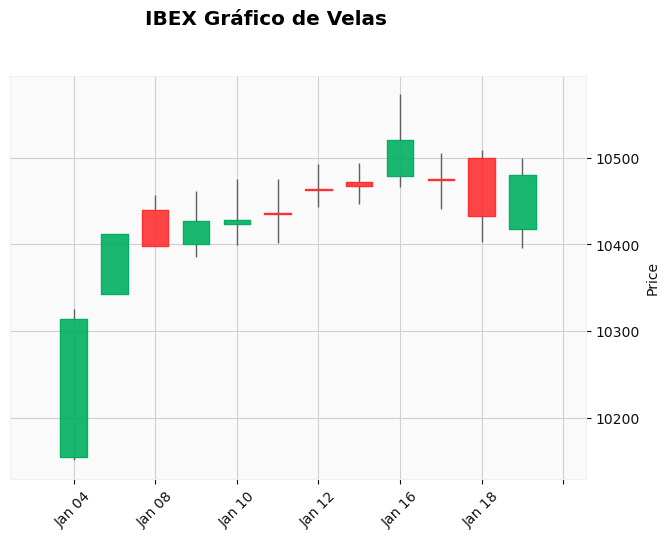

In [6]:
import matplotlib.pyplot as plt
import mplfinance as mpf

df_val = calc_ret.df_val

# Convertir el índice a un objeto DatetimeIndex
df_val.index = pd.to_datetime(df_val.index)

# Ordenar el DataFrame por el índice de fechas
df_val = df_val.sort_index()

# Seleccionar un rango de fechas utilizando loc
df_val = df_val.loc['2018-01-04':'2018-01-20']

# Crear el gráfico de velas
mpf.plot(df_val, type='candle', style='yahoo', title=value_name + ' Gráfico de Velas')

# Mostrar el gráfico
plt.show()



**<u>Observaciones:</u>** \
Si las fechas no existen en el DataFrame, devolverá el error `/tmp/ipykernel_8010/641114363.py:6: FutureWarning`

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.'. Es necesario asegurarse de que las fechas están incluidas en el índice de filas del DataFrame.

### Gráfico de velas con plotly 

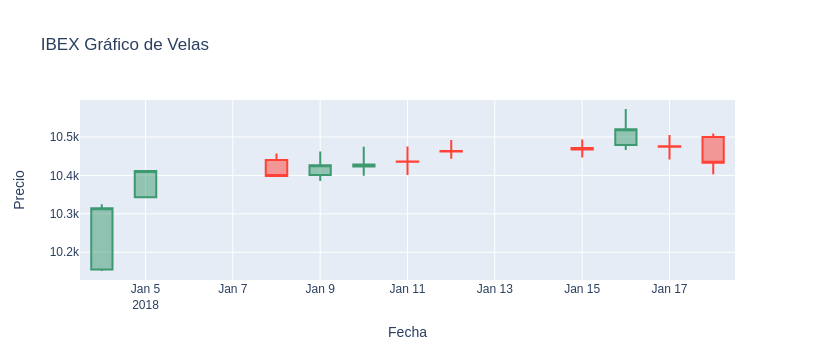

In [7]:
import plotly.graph_objects as go

df_val = calc_ret.df_val
# Convertir el índice a un objeto DatetimeIndex
df_val.index = pd.to_datetime(df_val.index)

# Ordenar el DataFrame por el índice de fechas
df_val = df_val.sort_index()

# Seleccionar un rango de fechas utilizando loc
df_val = df_val.loc['2018-01-04':'2018-01-18', :]

# Crear una figura de Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df_val.index,  # Utilizar el índice de fechas como valores x
    open=df_val['Open'],
    high=df_val['High'],
    low=df_val['Low'],
    close=df_val['Close']
)])

# Personalizar el diseño del gráfico
fig.update_layout(
    title=value_name + ' Gráfico de Velas',
    xaxis_title='Fecha',
    yaxis_title='Precio',
)

# Sin Rangeslider
fig.update_layout(xaxis_rangeslider_visible=False)

# Mostrar el gráfico
fig.show()


**<u>Observaciones:</u>** \
Si las fechas no existen en el DataFrame, devolverá el error '/tmp/ipykernel_8010/641114363.py:6: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.'. Es necesario asegurarse de que las fechas están incluidas en el índice de filas del DataFrame.

# Risk free calculation

[Investopedia. Risk-Free Rate of Return](https://www.investopedia.com/terms/r/risk-freerate.asp)

[Looking for risk free rates with pythonLooking for risk free rates with python](https://pass456.medium.com/looking-for-risk-free-rates-with-python-80f23e47e70a)

La Tasa Libre de Riesgo es la rentabilidad que se obtiene al invertir en un activo que se considera que es cien por cien seguro y, por tanto, está libre de riesgo.

In [8]:
# Cálculo de la tasa libre de riesgo. 
# Rendimiento del Tesoro 10 Años (^TNX) 

""" Ultimo valor de la tasa libre de riesgo a 10 años de EE.UU, en tanto por uno, 
el ticker corresponde a: ^TNX"""

def get_risk_free_rate(start_day, end_day) :
    ticker = '^TNX'
    risk_free_rate = yf.download(ticker, start= start_date, end = end_date, progress=False) ['Adj Close'] 
    return risk_free_rate

start_date = '2010-1-4' 
end_date = '2023-6-20'
risk_free_rate = get_risk_free_rate(start_date, end_date)
rfr = risk_free_rate[-1] 
rfr

3.7690000534057617

[European Government Bonds](https://www.investing.com/rates-bonds/european-government-bonds)

# Medias móviles

## Medias Móviles Simples (SMA).

**Referencias:**

[Indicadores Técnicos Quantisti](https://blog.quantinsti.com/build-technical-indicators-in-python/)

[(SMA. Investopedia)](https://www.investopedia.com/terms/s/sma.asp) [(SMA. Investopedia)](https://www.investopedia.com/terms/s/sma.asp) 

https://medium.datadriveninvestor.com/unleashing-the-power-of-momentum-trading-with-python-b878b7b5f805

Para la estrategia ver https://www.learnpythonwithrune.org/backtesting-a-trading-strategy-with-pandas-and-python/

Para implementar una estrategia de impulso de promedio móvil, los inversores pueden usar una variedad de indicadores de promedio móvil `(MA's)` diferentes, como promedios móviles simples `(SMA)`, promedios móviles exponenciales `(EMA)`o promedios móviles ponderados, para identificar tendencias de impulso y tomar decisiones de compra o venta. Por ejemplo, un inversor podría utilizar una media móvil de 150 días para identificar la dirección de la tendencia subyacente del precio de una acción y comprar la acción si se cotiza por encima de la media móvil, o vender la acción si se cotiza por debajo de la media móvil. .

Una ventaja clave de usar `MA's` en una estrategia de impulso es que pueden ayudar a suavizar las fluctuaciones de precios a corto plazo y brindar una imagen más clara de la tendencia subyacente del precio de un activo. Además, las `MA's` son relativamente simples de calcular e interpretar, lo que los convierte en una opción popular entre los inversores que buscan un indicador técnico fácil de usar.

La `Simple Moving Average (SMA)` es una medida que calcula el promedio de un conjunto de precios, generalmente precios de cierre, durante un período determinado. Se utiliza en el análisis técnico para determinar si un activo está en una tendencia alcista o bajista. La `SMA` se basa en la media aritmética de `x` datos anteriores, y su influencia depende del número de períodos considerados. Cuanto mayor sea el número de períodos, mayor será la influencia de los datos antiguos en el cálculo. Por otro lado, si se selecciona un número bajo de períodos, los datos más recientes tendrán mayor peso en la predicción.

In [47]:
# Selección de datos para el análisis.
ticker_val = '^IBEX'
value_name = 'IBEX'
start_date = "2016-01-04"
end_date = "2021-12-31"

calc_ret = CalculaRetornos(ticker_val, start_date, end_date)
df_val, df_value, value_name = calc_ret.get_quotes()

df_value.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1534 entries, 2016-01-04 to 2021-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1534 non-null   float64
dtypes: float64(1)
memory usage: 24.0 KB


### Función para calcular y graficar la SMA.

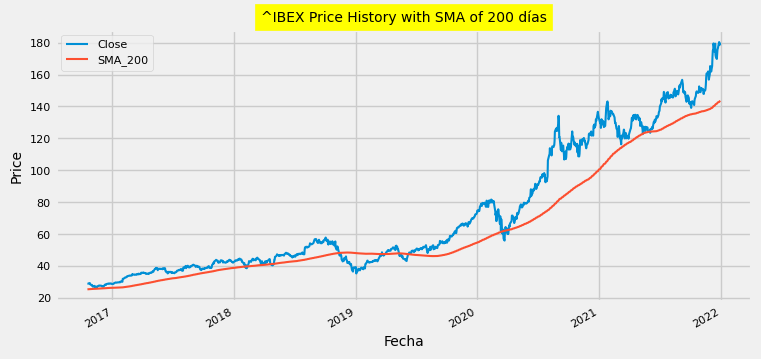

In [67]:
# Función para calcular la EMA
def get_SMA(df, n, value_name):
    EMA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='SMA_' + str(n))
    df = df.join(EMA)
    return df 

def get_SMA_plot( df, n):   
    df_sma.plot(figsize = (8, 4), lw=1.5);  

    plt.title(value_name + f" Price History with SMA of {periods} días",fontsize=10, backgroundcolor='yellow')
    plt.xlabel('Fecha',fontsize=10)
    plt.ylabel('Price',fontsize=10)
    plt.legend(loc='upper left',fontsize=8)

    # Ajustar tamaño de las fechas en la escala x
    plt.gca().xaxis.set_tick_params(labelsize=8)

    # Ajustar tamaño de los números en la escala y
    plt.gca().yaxis.set_tick_params(labelsize=8)
    plt.show()    

periods = 200
df = df_value.copy()
datos_ema = get_SMA(df, periods, value_name)

# Plot graphic
get_SMA_plot(datos_ema, periods )
 


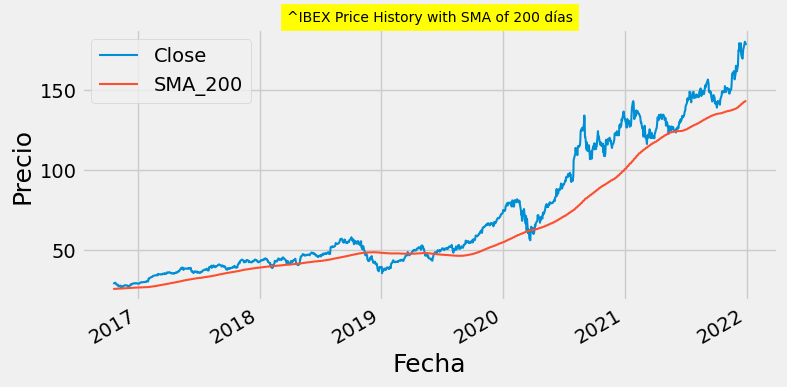

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1110 entries, 2017-08-04 to 2021-12-30
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    1110 non-null   float64
 1   SMA_200  1110 non-null   float64
dtypes: float64(2)
memory usage: 26.0 KB


In [48]:
# Función para calcular SMA's
def get_SMA(df, n):
    SMA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='SMA_' + str(n))
    df = df.join(SMA)
    return df

def get_SMA_plot(df, value_name, n):   
    df.plot(figsize=(8, 4), lw=1.5)  # Corrección en esta línea

    plt.title(value_name + f" Price History with SMA of {n} días", fontsize=10, backgroundcolor='yellow')
    plt.xlabel('Fecha', fontsize=18)
    plt.ylabel('Precio', fontsize=18)
    plt.legend(loc='upper left')
    plt.show()

periods = 200

datos = df_value.copy()

datos_sma = get_SMA(datos, periods)

# eliminamos las primeras 'priodos' filas.
datos_sma = df_sma[periods:]
# Graficar
get_SMA_plot(df_sma, value_name, periods)

 
datos_sma.info()

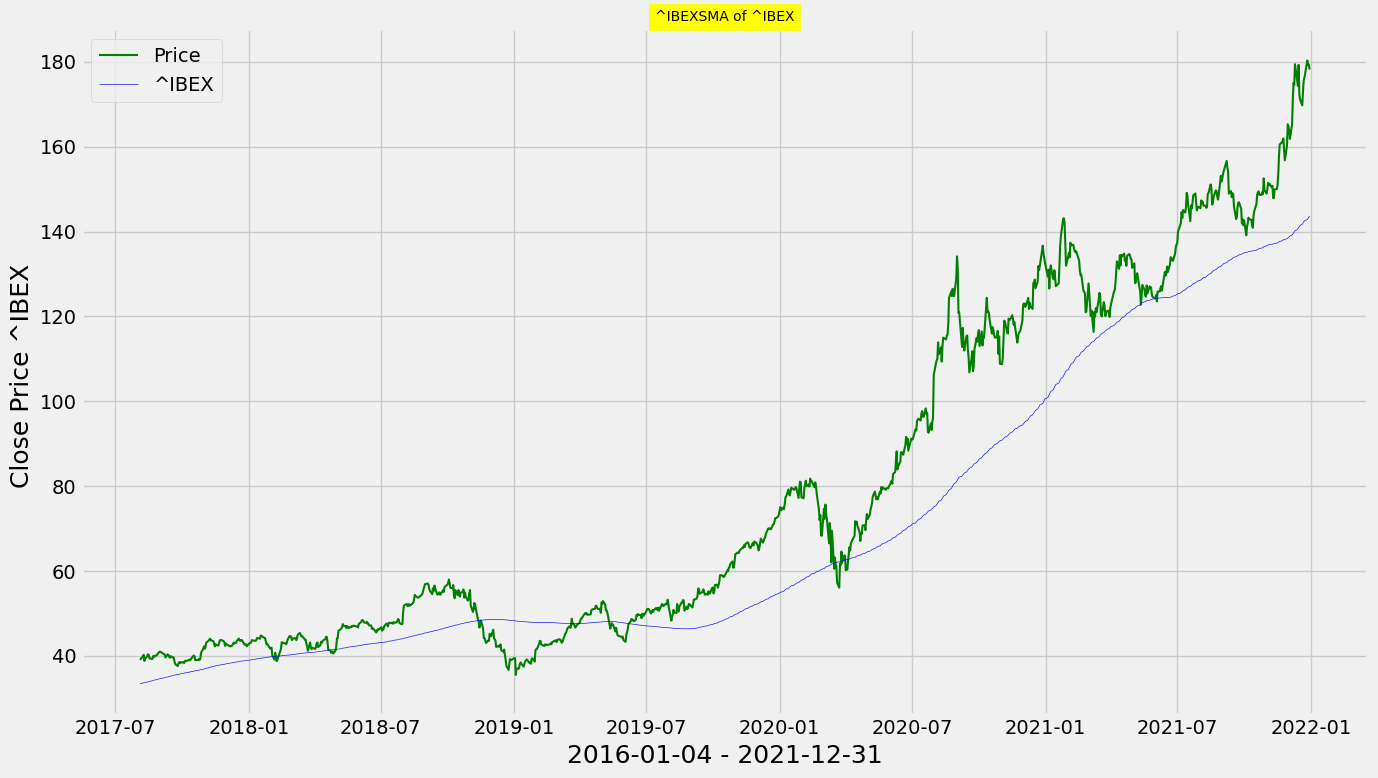

In [49]:
import matplotlib.pyplot as plt

# Gráfica de cotizaciones y SMA.
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(datos_sma['Close'], color='green', label='Price', lw=1.5)
ax.plot(datos_sma['SMA_' + str(periods)] , label = value_name ,linewidth=0.5, color='blue', alpha = 0.9 )
ax.set_title(value_name + 'SMA of '+ value_name,fontsize=10, backgroundcolor='yellow')
ax.set_xlabel(f'{start_date} - {end_date}' ,fontsize=18)
ax.set_ylabel(f'Close Price {value_name} ' , fontsize=18)
legend = ax.legend(loc='upper left')
ax.grid(visible = True)
plt.tight_layout()
plt.show()

# Customize and show the plot
ax.legend(loc='upper left')
ax.set_title(f'SMA of {value_name}')
plt.show()


### Clase para calcular y graficar la SMA.

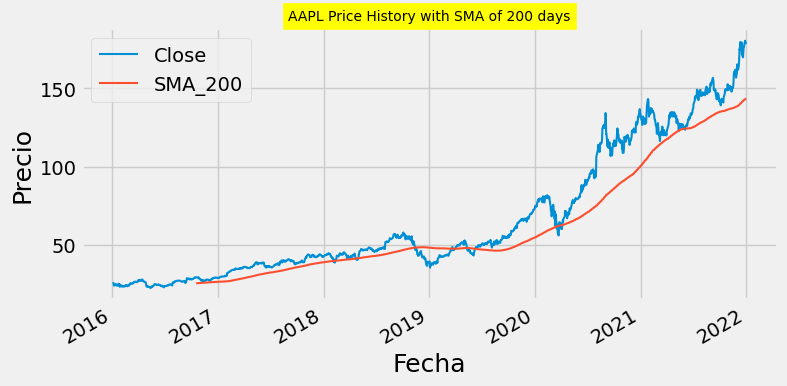

In [73]:
import pandas as pd
import matplotlib.pyplot as plt


class calcula_plot_SMA:
    def __init__(self, df, value_name, periods):
        self.df = df
        self.value_name = value_name
        self.periods = periods

    def get_SMA(self, n):
        SMA = pd.Series(self.df['Close'].rolling(n, min_periods=n).mean(), name='SMA_' + str(n))
        self.df = self.df.join(SMA)
        return self.df

    def plot_SMA(self):
        df_sma = self.get_SMA(self.periods)
        
        df_sma.plot(figsize=(8, 4), lw=1.5)
        
        plt.title(self.value_name + f" Price History with SMA of {self.periods} days", fontsize=10, backgroundcolor='yellow')
        plt.xlabel('Fecha', fontsize=18)
        plt.ylabel('Precio', fontsize=18)
        plt.legend(loc='upper left')
        plt.show()


# Parámetros
periods = 200

calcula_sma = calcula_plot_SMA(df_value, value_name, periods)
calcula_sma.plot_SMA()



### SMA utilizando Talib

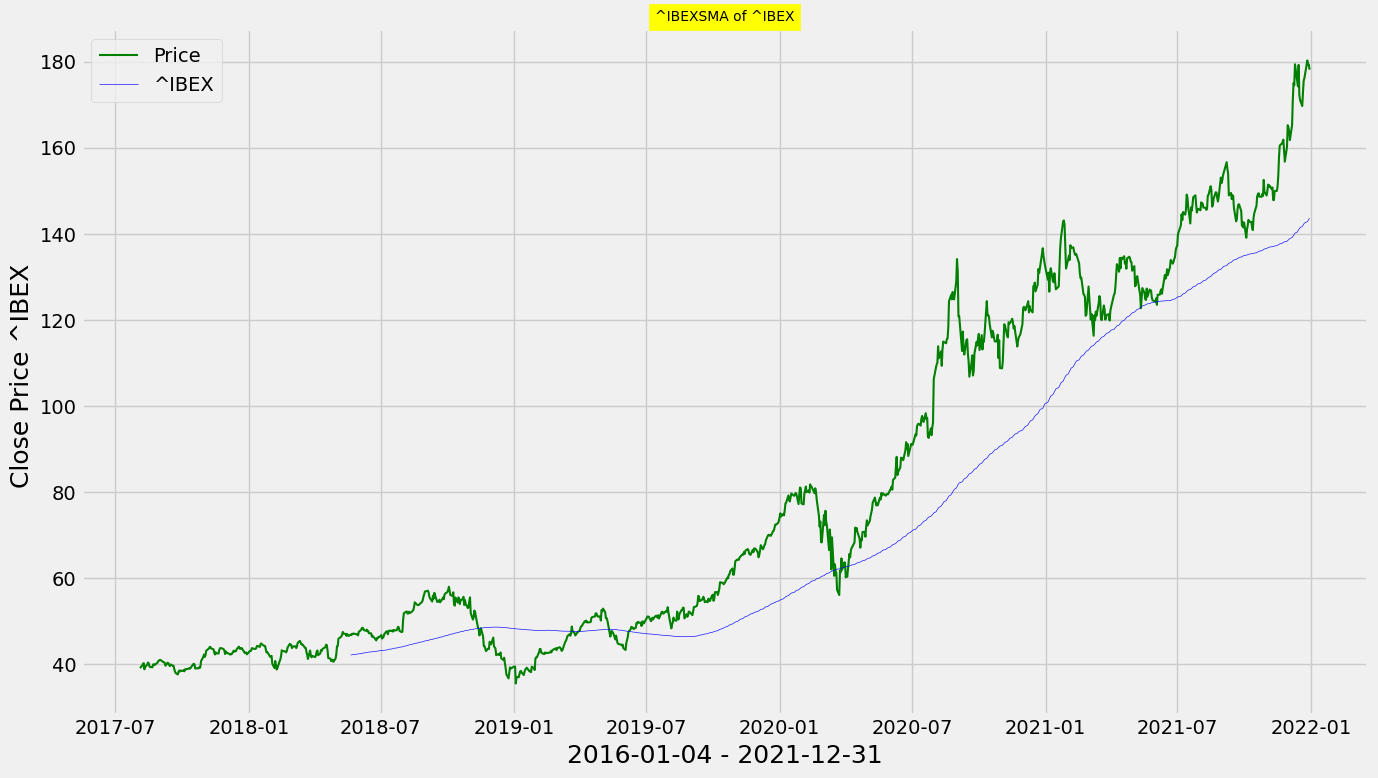

In [54]:
import talib as tb
#  EMA with Talib
SMA = tb.SMA(datos_sma['Close'], timeperiod=200)

# Gráfica de cotizaciones y SMA.
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(datos_sma['Close'], color='green', label='Price', lw=1.5)
ax.plot(SMA , label = value_name ,linewidth=0.5, color='blue', alpha = 0.9 )
ax.set_title(value_name + 'SMA of '+ value_name,fontsize=10, backgroundcolor='yellow')
ax.set_xlabel(f'{start_date} - {end_date}' ,fontsize=18)
ax.set_ylabel(f'Close Price {value_name} ' , fontsize=18)
legend = ax.legend(loc='upper left')
ax.grid(visible = True)
plt.tight_layout()
plt.show()

# Customize and show the plot
ax.legend(loc='upper left')
ax.set_title(f'SMA of {value_name}')
plt.show()

### Gráfica con Ploty

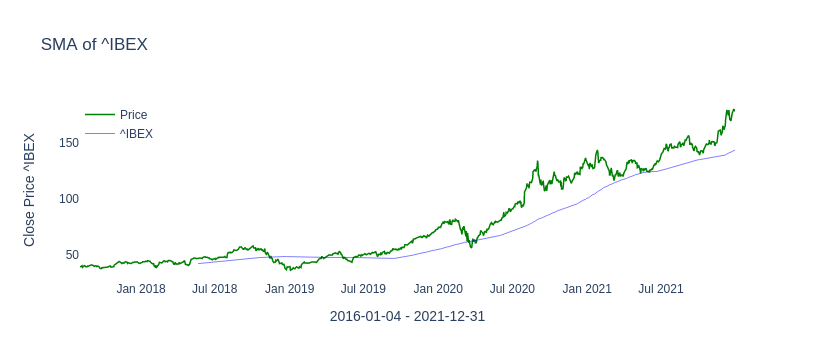

In [55]:
import plotly.graph_objects as go

# Función para calcular la SMA
fig = go.Figure()
fig.add_trace(go.Scatter(x=datos_sma.index, y=datos_sma['Close'], mode='lines', name='Price', line=dict(color='green', width=1.5)))
fig.add_trace(go.Scatter(x=datos_sma.index, y=SMA, mode='lines', name=value_name, line=dict(color='blue', width=0.5)))

fig.update_layout(
    title=f'SMA of {value_name}',
    xaxis=dict(title=f'{start_date} - {end_date}', showgrid=True),
    yaxis=dict(title=f'Close Price {value_name}', showgrid=True),
    legend=dict(x=0, y=1, traceorder="normal"),
    plot_bgcolor='white',
    showlegend=True
)

fig.show()



## Medias Móviles Exponenciales (EMA's)

[Moving Average Trading Strategy](https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/ )

Es fácil observar que las series de tiempo de la media móvil simple `SMA` son mucho menos ruidosas que las series de tiempo del precio original. Sin embargo, esto tiene un costo: las series de tiempo de la `SMA` se retrasan con respecto a las series de tiempo del precio original, lo que significa que los cambios en la tendencia se ven con un retraso de varios días. ¿De cuánto es este retraso?

Para una media móvil simple (SMA) calculada utilizando días, el retraso es aproximadamente de días, lo que puede afectar significativamente nuestra estrategia.

la `EMA` es una técnica de suavizado que asigna un mayor peso a los datos más recientes. Permite reducir el retraso en comparación con la `SMA` y reaccionar más rápidamente a los cambios en los datos. El parámetro de decaimiento `α` y la longitud de la ventana `M` determinan la rapidez con la que la `EMA` responde a los cambios en los datos.

Una forma de reducir el retraso inducido por el uso de la `SMA` es utilizar la llamada media móvil exponencial `EMA`, definida como:

$$EMA(t) = (1 - \alpha)EMA(t+1) + (\alpha p(t)$$

$$EMA(T_0) = p(t_0)$$

donde `p(t)` es el precio en el tiempo y alpha es llamado el parámetro de decaimiento para la `EMA`. `Alpha` está relacionado con el retraso de la siguiente manera:

$$\alpha = \frac {1}{L+1}$$

y la longitud de la ventana `span` M como:

$$\alpha = \frac {2}{M+1}$$

La fórmula muestra que el valor de la `EMA` en el tiempo `t` se calcula como una combinación del valor de la `EMA` en el tiempo `t+1` y el precio en el tiempo `t`, ponderados por el parámetro de decaimiento `α`. El valor de `α` determina el peso relativo que se le da al precio actual y al valor de la `EMA` anterior. A medida que `α` se acerca a `1`, la `EMA` reaccionará más rápidamente a los cambios recientes en los datos.

El valor inicial de la `EMA`, en el tiempo `T0`, se establece igual al precio en ese tiempo:

(EMAT0)=p(t0)   

La relación entre el parámetro de decaimiento `α` y la longitud de la ventana `M` se establece de la siguiente manera:

$\alpha =1L+1$

O bien:

$\alpha =2M+1$

Donde `L` es el número de períodos de la `EMA` y `M` es la longitud de la ventana o el número de períodos utilizados en el cálculo de la `EMA`. A medida que `M` aumenta, `α` disminuye, lo que resulta en una `EMA` que reacciona más lentamente a los cambios en los datos. \
Dependiendo del período de inversión, se ajusta el período de cálculo de la media móvil. Para `plazos cortos`, el período de cálculo oscila `entre 3 y 25 días`, para el `plazo medio` `de 30 a 75 días`, y para el `plazo largo` `entre 100 y 200 días`.

Cuando el precio de una acción cruza su media móvil de 200 días, es una señal técnica de que ha ocurrido una reversión.


In [ ]:
 # Conseguir cotizaciones.
investment_value = 100000.0
ticker = '^IBEX'
value_name = 'IBEX'
start_date = "2010-12-30"
end_date = "2019-10-28"

calc_ret = CalculaRetornos(investment_value, ticker, value_name, start_date, end_date)
calc_ret.run_analysis()
datos_ema = calc_ret.df_value.dropna()[:2]

In [61]:
# Selección de datos para el análisis.
ticker_val = '^IBEX'
value_name = 'IBEX'
start_date = "2016-01-04"
end_date = "2021-12-31"

calc_ret = CalculaRetornos(ticker_val, start_date, end_date)
df_val, df_value, value_name = calc_ret.get_quotes()

df_value.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1534 entries, 2016-01-04 to 2021-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1534 non-null   float64
dtypes: float64(1)
memory usage: 24.0 KB


### Función para calcular y graficar la EMA.

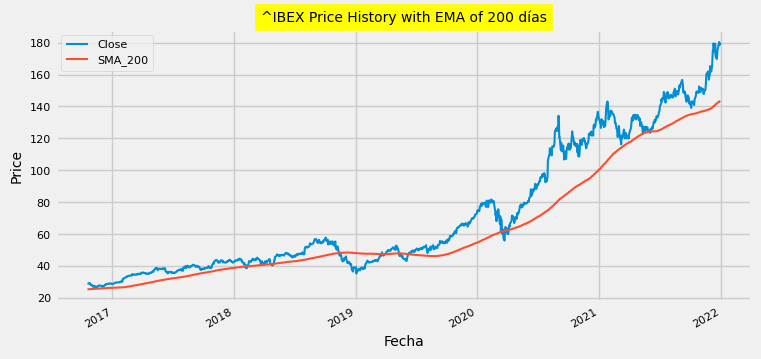

In [68]:
# Función para calcular la EMA
def get_EMA(df, n, value_name):
    EMA = pd.Series(df['Close'].ewm(span=periods, adjust=False).mean(), name ='SMA_' + str(n))
    df = df.join(EMA)
    return df 

def get_EMA_plot( df, n):   
    df_sma.plot(figsize = (8, 4), lw=1.5);  

    plt.title(value_name + f" Price History with EMA of {periods} días",fontsize=10, backgroundcolor='yellow')
    plt.xlabel('Fecha',fontsize=10)
    plt.ylabel('Price',fontsize=10)
    plt.legend(loc='upper left',fontsize=8)

    # Ajustar tamaño de las fechas en la escala x
    plt.gca().xaxis.set_tick_params(labelsize=8)

    # Ajustar tamaño de los números en la escala y
    plt.gca().yaxis.set_tick_params(labelsize=8)
    plt.show()    

periods = 200
df = df_value.copy()
datos_ema = get_EMA(df, periods, value_name)

# Plot graphic
get_EMA_plot(datos_ema, periods )
 


### Clase para calcular y graficar la EMA.

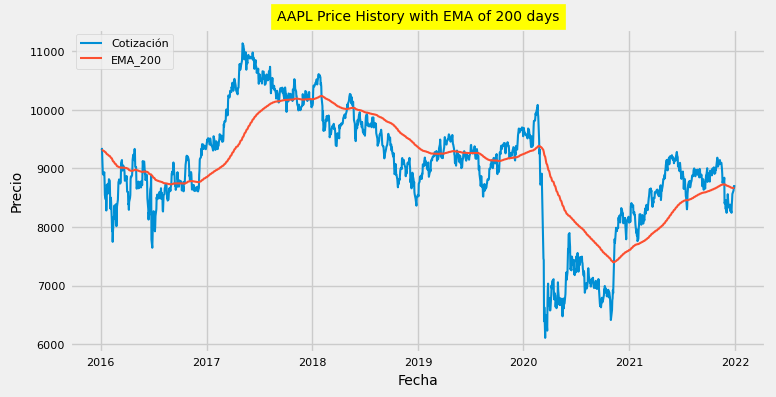

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

class Calcula_plot_EMA:
    def __init__(self, periods):
        self.periods = periods

    def calculate_EMA(self, df):
        EMA = pd.Series(df['Close'].ewm(span=self.periods, adjust=False).mean(), name='EMA_' + str(self.periods))
        df = df.join(EMA)
        return df

    def plot_EMA(self, df, value_name):
        plt.figure(figsize=(8, 4))
        plt.plot(df.index, df['Close'], label='Cotización', lw=1.5)
        plt.plot(df.index, df['EMA_' + str(self.periods)], label='EMA_' + str(self.periods), lw=1.5)
        plt.title(value_name + f" Price History with EMA of {self.periods} days", fontsize=10, backgroundcolor='yellow')
        plt.xlabel('Fecha', fontsize=10)
        plt.ylabel('Precio', fontsize=10)
        plt.legend(loc='upper left', fontsize=8)
        
        # Ajustar tamaño de las fechas en la escala x
        plt.gca().xaxis.set_tick_params(labelsize=8)
    
        # Ajustar tamaño de los números en la escala y
        plt.gca().yaxis.set_tick_params(labelsize=8)
        plt.show()

# Parámetros
periods = 200
ema_calculator = Calcula_plot_EMA(periods)

df_ema = ema_calculator.calculate_EMA(datos_ema)
ema_calculator.plot_EMA(df_ema, value_name)


# Resúmen de llamadas a las funciones anteriores.
En adelante, usaremos estas sentencias para crear los dataFrames base de los análisis.

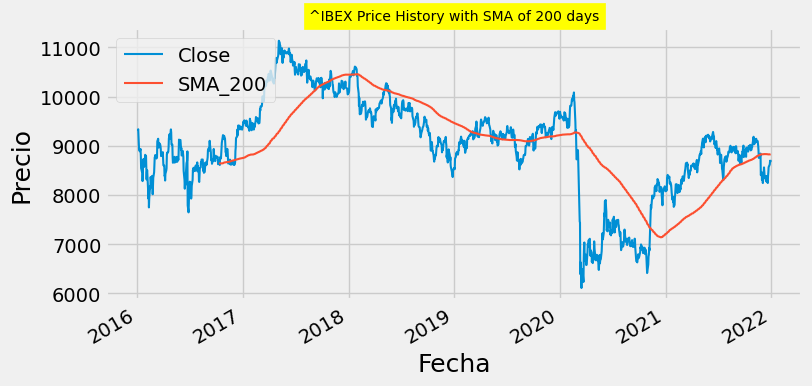

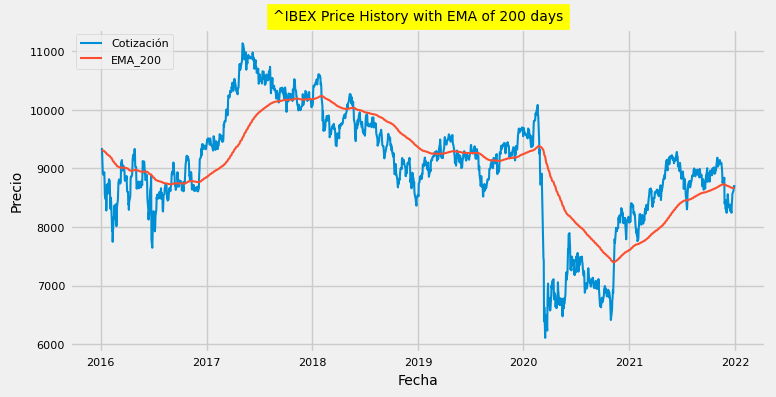

In [80]:
 # Conseguir cotizaciones.
investment_value = 100000.0

# Parámetros de análisis
ticker_val = '^IBEX'
value_name = 'IBEX'
start_date = "2016-01-04"
end_date = "2021-12-31"

# Importación de cotizaciones y cálculo de retornos
calc_ret = Calcula_retornos(ticker_val, start_date, end_date)
df_val, df_value, value_name = calc_ret.get_quotes()
df_returns = calc_ret.calculate_variations()

# Parámetros
periods = 200

calcula_sma = calcula_plot_SMA(df_value, value_name, periods)
calcula_sma.plot_SMA()

# Cálculo de una EMA
periods = 200
ema_calculator = Calcula_plot_EMA(periods)

df_ema = ema_calculator.calculate_EMA(datos_ema)
ema_calculator.plot_EMA(df_ema, value_name)